In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime

In [2]:
x, y, z = 4/np.sqrt(3),4/np.sqrt(3),4/np.sqrt(3)
r = 4
a = 2

In [3]:
# calculate point's coordinates from charge using random walk
# return point's coordinates
def bsurf(x, y, z, r) :
    temp = a/r
    p2 = np.random.rand(1)
    costh = -(1.0-temp)**2 + 2*(1.0-temp)*(1+(temp)**2.0)*p2 + 2.0*temp*(1+(temp)**2)*(p2)**2
    costh = costh/((1.0-temp+2.0*temp*p2)**2)
    sinth = np.sqrt(np.abs(1.0-(costh**2)))
    
    yyy = np.random.rand(1)
    phi = 2*np.pi*yyy
    cosph = np.cos(phi)
    sinph = np.sin(phi)
    
    xold = x
    yold = y
    zold = z
    p = np.sqrt(xold**2 + yold**2)
    x = a*(sinth*cosph*xold*zold/(p*r) - sinth*sinph*yold/p + costh*xold/r)
    y = a*(sinth*cosph*yold*zold/(p*r) + sinth*sinph*xold/p + costh*yold/r)
    z = a*(-sinth*cosph*p/r + costh*zold/r)
    
    return (x, y, z)

In [4]:
# divide the hemisphere to 100 pins
# delta(theta) = pi/100
pts = 1000000
thetas = []

# direct sampling
# sampling pts points
# a sphere with radius 1, center at origin
t = datetime.datetime.now()
for step in range(pts):
    # create a vector v_x, v_y, v_z --> theta = (Ox, v) from -pi/2 to pi/2
    (v_x, v_y, v_z) = bsurf(x, y, z, r)
    sintheta = (np.sqrt((v_x-(x/2))**2+(v_y-(y/2))**2+(v_z-(z/2))**2))/(2*a)
    theta = np.arcsin(sintheta[0])
    thetas.append(theta*2)
    
timedelta = datetime.datetime.now() - t
print(timedelta)

0:00:54.067866


In [5]:
# analytic
the = np.linspace(0,np.pi);
q = 600*np.sin(the)/(8*np.pi*(20-16*np.cos(the))**(3/2));

In [6]:
Rc = 4;
a = Rc/2;
p = 1;
z1 = a - p;
d = (Rc**2)/(2*a-z1) - 2*a;
d

1.333333333333333

In [9]:
def plane():
    x = np.random.rand(1)
    rho_d = np.sqrt((1-x**2)/(x**2))
    return rho_d[0]

In [10]:
def sphere(x,y,z):
    r = np.sqrt(x**2 + y**2 + z**2)
    the = np.arccos(z/r)
    phi = np.arctan(y/x)
    return (r,the,phi)

In [11]:
# point in plane --> sphere
# r1_d = plane()
def point(rho_d, Rc):
    rho = rho_d*d
    (xA, yA, zA) = (rho,0,-4)
    v = sphere(xA,yA,zA)
    v1 = Rc**2/v[0]
    xA1 = v1*np.sin(v[1])*np.cos(v[2])
    yA1 = v1*np.sin(v[1])*np.sin(v[2])
    zA1 = v1*np.cos(v[1])
    return [xA1,yA1,zA1]

In [6]:
# Rodrigues's rotation 
# v = point(rho_d, Rc)
def rotate(v):   
    theta = np.random.uniform(np.pi*2)
    k = np.array([0.0,0.0,-1.0])
    v = np.array(v)
    v_rot = v*np.cos(theta) + np.cross(k,v)*np.sin(theta) + k*(np.dot(k,v))*(1-np.cos(theta));
    return v_rot

0:00:06.780379


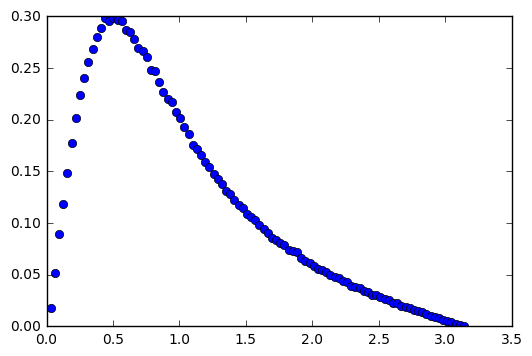

In [99]:
pts1 = 1000000
thetas1 = []  # without rotation
thetas2 = []


# sampling via conformal map
t1 = datetime.datetime.now()
for step in range(pts1):
    rho_d = plane()
    rho = rho_d * d
    arctantheta = np.arctan(rho/Rc)
    thetas1.append(2*arctantheta)

timedelta1 = datetime.datetime.now() - t1
print(timedelta1)

fig,ax = plt.subplots(1,1)             
y1, binEd1 = np.histogram(thetas1, bins = 100, density = 1);
bincenters1 = binEd1[1:]
total = 0
for i in range(100):
    rh = 4*np.tan(bincenters1[i]/2)
    bin = y1[i]*(4*a)/(Rc*np.sqrt(4*a**2+rh**2))
    y1[i] = bin
ax.plot(bincenters1, y1, 'o');

In [17]:
# sampling with 75 times
t1 = datetime.datetime.now()
for steps in range(75):
    pts1 = 1000000
    thetas1 = []
    for step in range(pts1):
        r1_d = plane()
        r1 = r1_d * d
        arctantheta = np.arctan(r1/Rc)
        thetas1.append(2*arctantheta)

timedelta1 = datetime.datetime.now() - t1
print(timedelta1)

0:07:28.327442


In [8]:
# sampling via conformal map and then do rotation to check
t1 = datetime.datetime.now()
pts1 = 1000000
thetas1 = []  # without rotation
thetas2 = []
for step in range(pts1):
    x = np.random.rand(1)
    rho_d = np.sqrt((1-x**2)/(x**2))
    rho = rho_d * d
    (xA, yA, zA) = (rho,0,-4)
    r = np.sqrt(xA**2 + zA**2)
    sinthe = rho/r
    v1 = Rc**2/r
    xA1 = v1*sinthe
    zA1 = v1*Rc/r
    v8 = [xA1[0],0,zA1[0]]
    v1 = rotate(v8)
    costheta2 = np.sqrt(v1[0]**2 + v1[1]**2 + v1[2]**2)/Rc
    thetas2.append(2*np.arccos(costheta2))

timedelta1 = datetime.datetime.now() - t1
print(timedelta1)

0:00:44.424353


In [113]:
# export data

table = [bincenters1, y1]
my_df = pd.DataFrame(table).transpose()
my_df.to_csv('table.csv', index = None, header = None)

table1 = [the1, q1]
my_df1 = pd.DataFrame(table1).transpose()
my_df1.to_csv('table1.csv', index = None, header = None)

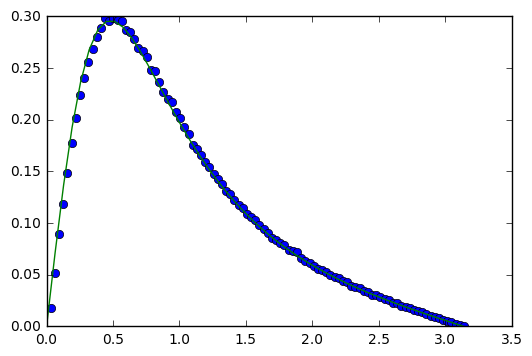

In [102]:
# analytic
fig,ax = plt.subplots(1,1)   
ax.plot(bincenters1, y1, 'o');
the1 = np.linspace(0,np.pi);
q1 = 3*(2.35)*np.sin(the1)/(2*np.pi*(5-4*np.cos(the1))**(3/2));
plt.plot(the1,q1)